# 3 Pointers Made against shooting.csv

### Import packages

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from scipy.stats import pearsonr
import itertools

pd.set_option("display.max_columns", None)

### Set working directory

In [2]:
# Print working directory
cwd = os.getcwd()
print(f'Directory: {cwd}')

# Change working directory
os.chdir('/Users/tyler/OneDrive/Documents/Python/NBA')

# Print working directory
cwd = os.getcwd()
print(f'Directory: {cwd}')

Directory: C:\Users\tyler\OneDrive\Documents\Python\NBA\backend\analysis\3p
Directory: C:\Users\tyler\OneDrive\Documents\Python\NBA


## Exploratory Data Analysis

### Import data

In [3]:
df = pd.read_csv('backend/data/shooting.csv').drop(['Unnamed: 0'], axis=1)

### Basic exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203850 entries, 0 to 203849
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      203850 non-null  object 
 1   visitor   203850 non-null  object 
 2   home      203850 non-null  object 
 3   team      203850 non-null  int64  
 4   quarter   203828 non-null  object 
 5   fg        203812 non-null  float64
 6   fga       203812 non-null  float64
 7   fg_perc   203812 non-null  float64
 8   2p        203812 non-null  float64
 9   2pa       203812 non-null  float64
 10  2p_perc   203809 non-null  float64
 11  3p        203812 non-null  float64
 12  3pa       203812 non-null  float64
 13  3p_perc   202349 non-null  float64
 14  efg_perc  203812 non-null  float64
 15  ast       203812 non-null  float64
 16  ast_perc  203789 non-null  float64
dtypes: float64(12), int64(1), object(4)
memory usage: 26.4+ MB


In [5]:
# Convert 'date' column to Date object
df['date'] = pd.to_datetime(df['date'])

# Conver 'team' column to Team Name
df['team'] = np.where(df['team'], df['home'], df['visitor'])

# Define statistics
stats = ['fg', 'fga', 'fg_perc', '2p', '2pa', '2p_perc', '3p', '3pa', '3p_perc', 'efg_perc', 'ast', 'ast_perc']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203850 entries, 0 to 203849
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      203850 non-null  datetime64[ns]
 1   visitor   203850 non-null  object        
 2   home      203850 non-null  object        
 3   team      203850 non-null  object        
 4   quarter   203828 non-null  object        
 5   fg        203812 non-null  float64       
 6   fga       203812 non-null  float64       
 7   fg_perc   203812 non-null  float64       
 8   2p        203812 non-null  float64       
 9   2pa       203812 non-null  float64       
 10  2p_perc   203809 non-null  float64       
 11  3p        203812 non-null  float64       
 12  3pa       203812 non-null  float64       
 13  3p_perc   202349 non-null  float64       
 14  efg_perc  203812 non-null  float64       
 15  ast       203812 non-null  float64       
 16  ast_perc  203789 non-null  float64    

In [6]:
total_df = df[df['quarter'] == 'total']
q1_df = df[df['quarter'] == 'q1']
q2_df = df[df['quarter'] == 'q2']
q3_df = df[df['quarter'] == 'q3']
q4_df = df[df['quarter'] == 'q4']

In [7]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40218 entries, 4 to 203849
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      40218 non-null  datetime64[ns]
 1   visitor   40218 non-null  object        
 2   home      40218 non-null  object        
 3   team      40218 non-null  object        
 4   quarter   40218 non-null  object        
 5   fg        40202 non-null  float64       
 6   fga       40202 non-null  float64       
 7   fg_perc   40202 non-null  float64       
 8   2p        40202 non-null  float64       
 9   2pa       40202 non-null  float64       
 10  2p_perc   40202 non-null  float64       
 11  3p        40202 non-null  float64       
 12  3pa       40202 non-null  float64       
 13  3p_perc   40202 non-null  float64       
 14  efg_perc  40202 non-null  float64       
 15  ast       40202 non-null  float64       
 16  ast_perc  40202 non-null  float64       
dtypes: datetime

### 3 Pointer's Made vs Year (--)

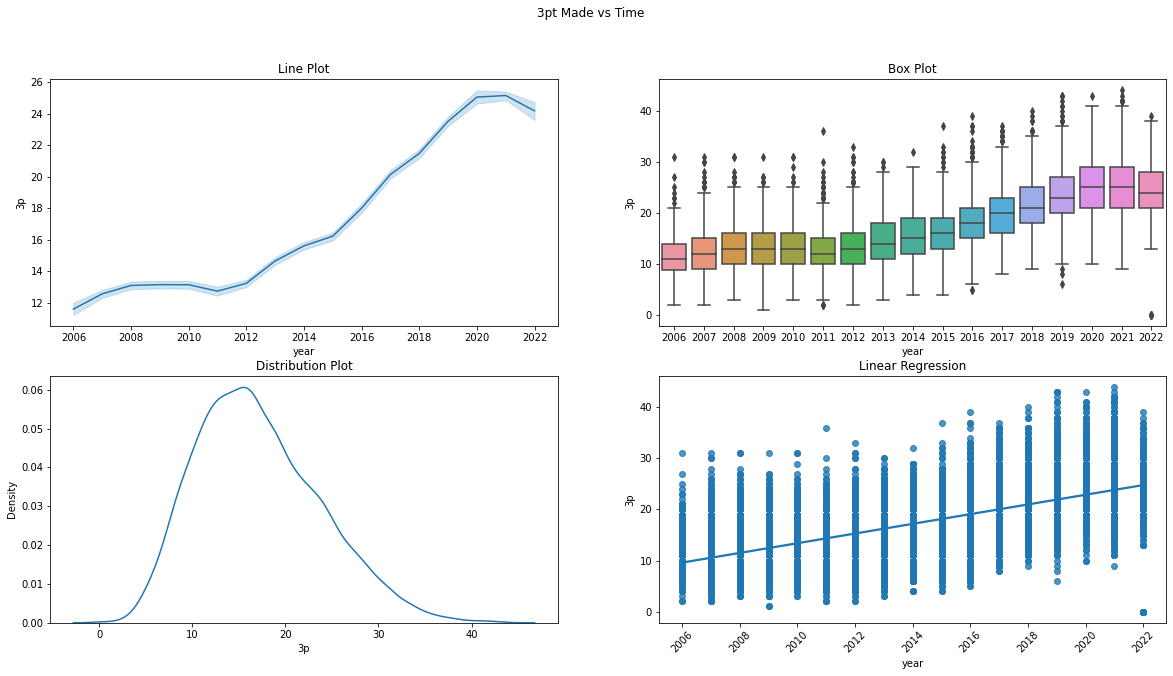

In [8]:
# Groupby and sum all statistics
totals = total_df.groupby(['date', 'visitor', 'home']).sum().reset_index()

# Create year and month columns
totals['year'] = totals['date'].dt.year
totals['month'] = totals['date'].dt.month

# Change plot size
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('3pt Made vs Time')
fig = plt.gcf()

# Plot lineplot of Total 3pt Made over Time
chart = sns.lineplot(x='year', y='3p', data=totals, ax= ax[0, 0]).set(title='Line Plot')

# Plot boxplot of Total 3pt Made over Time
chart = sns.boxplot(x='year', y='3p', data=totals, ax=ax[0, 1]).set(title= 'Box Plot')
plt.xticks(rotation=45)

# Plot distribution plot of Total 3pt Made over Time
chart = sns.kdeplot(x='3p', data=totals, ax=ax[1,0]).set(title='Distribution Plot')

# Plot linearregression of Total 3pt Made over Time
chart = sns.regplot(x='year', y='3p', data=totals, ax=ax[1, 1]).set(title='Linear Regression')

plt.show()

### 3 Pointer's Made vs Year (2015 - current)

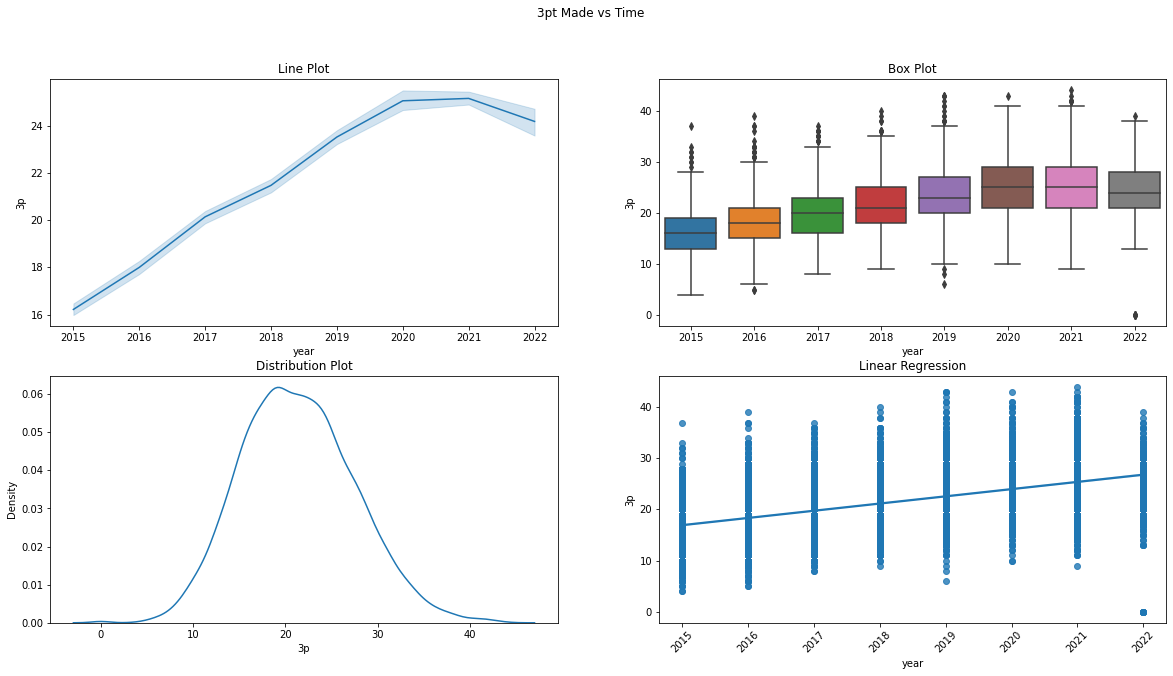

In [9]:
# Change plot size
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('3pt Made vs Time')
fig = plt.gcf()

year = 2015

# Plot lineplot of Total 3pt Made over Time
chart = sns.lineplot(x='year', y='3p', data=totals[totals['year'] >= year], ax= ax[0, 0]).set(title='Line Plot')

# Plot boxplot of Total 3pt Made over Time
chart = sns.boxplot(x='year', y='3p', data=totals[totals['year'] >= year], ax=ax[0, 1]).set(title= 'Box Plot')
plt.xticks(rotation=45)

# Plot distribution plot of Total 3pt Made over Time
chart = sns.kdeplot(x='3p', data=totals[totals['year'] >= year], ax=ax[1,0]).set(title='Distribution Plot')

# Plot linearregression of Total 3pt Made over Time
chart = sns.regplot(x='year', y='3p', data=totals[totals['year'] >= year], ax=ax[1, 1]).set(title='Linear Regression')

plt.xticks(rotation=45)
plt.show()

### 3 Pointer's Made vs FGA (2015 - current)

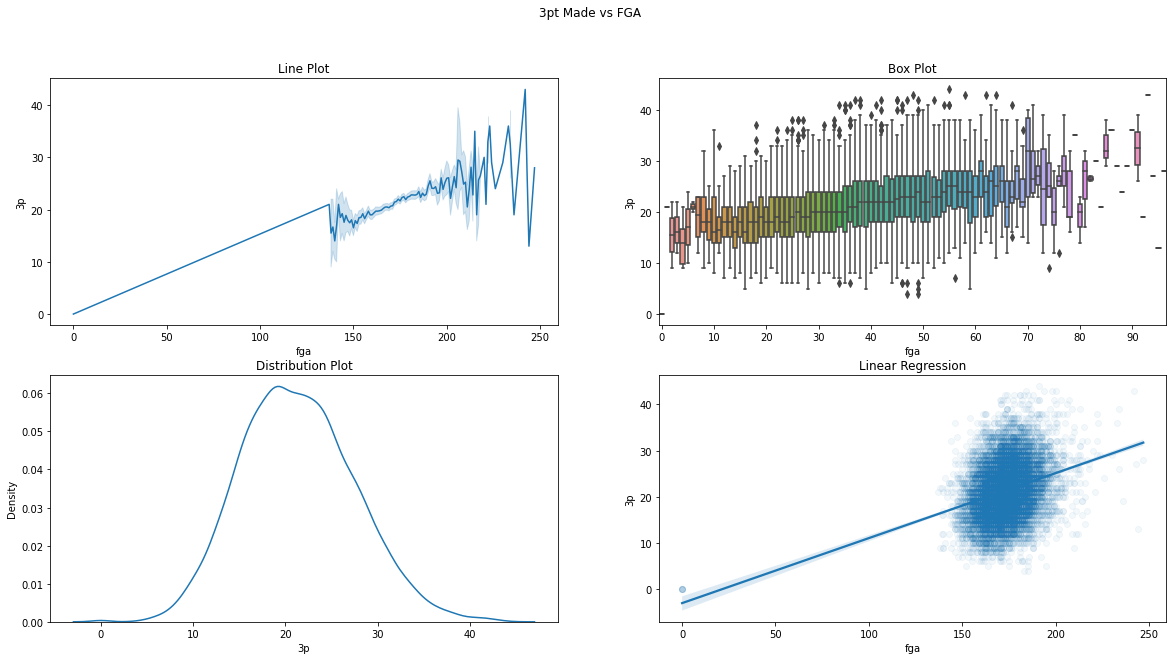

In [10]:
# Change plot size
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('3pt Made vs FGA')
fig = plt.gcf()

year = 2015

# Plot lineplot of Total 3pt Made over FGA
chart = sns.lineplot(x='fga', y='3p', data=totals[totals['year'] >= year], ax= ax[0, 0]).set(title='Line Plot')

# Plot boxplot of Total 3pt Made over FGA
chart = sns.boxplot(x='fga', y='3p', data=totals[totals['year'] >= year], ax=ax[0, 1]).set(title= 'Box Plot')
ax[0, 1].xaxis.set_major_locator(ticker.MultipleLocator(10))
ax[0, 1].xaxis.set_major_formatter(ticker.ScalarFormatter())

# Plot distribution plot of Total 3pt Made over FGA
chart = sns.kdeplot(x='3p', data=totals[totals['year'] >= year], ax=ax[1,0]).set(title='Distribution Plot')

# Plot linearregression of Total 3pt Made over FGA
chart = sns.regplot(x='fga', y='3p', data=totals[totals['year'] >= year], ax=ax[1, 1], scatter_kws={'alpha':0.05}).set(title='Linear Regression')

plt.show()

# Dataframe of team's last 15 performances

In [11]:
# Totals
total_df = df[df['quarter'] == 'total'].copy()

# Return ten lastest dates team played
def last_15_date(team, date):
    schedule = total_df[total_df['team'] == team].sort_values(by='date').reset_index()
    date_index = schedule[schedule['date'] == date].index[0]
    if date_index - 15 < 0:
        return None, None, None, None, None, None, None, None, None, None, None, None, None, None, None
    else:
        date_1, date_2 = schedule.iloc[date_index - 1]['date'], schedule.iloc[date_index - 2]['date']
        date_3, date_4 = schedule.iloc[date_index - 3]['date'], schedule.iloc[date_index - 4]['date']
        date_5, date_6 = schedule.iloc[date_index - 5]['date'], schedule.iloc[date_index - 6]['date']
        date_7, date_8 = schedule.iloc[date_index - 7]['date'], schedule.iloc[date_index - 8]['date']
        date_9, date_10 = schedule.iloc[date_index - 9]['date'], schedule.iloc[date_index - 10]['date']
        date_11, date_12 = schedule.iloc[date_index - 11]['date'], schedule.iloc[date_index - 12]['date']
        date_13, date_14 = schedule.iloc[date_index - 13]['date'], schedule.iloc[date_index - 14]['date']
        date_15 = schedule.iloc[date_index - 15]['date']
        return date_1, date_2, date_3, date_4, date_5, date_6, date_7, date_8, date_9, date_10, date_11, date_12, date_13, date_14, date_15

total_df['dates'] = total_df.apply(lambda x: last_15_date(x.team, x.date), axis=1)
total_df['date_1'], total_df['date_2'] = total_df['dates'].apply(lambda x: x[0]), total_df['dates'].apply(lambda x: x[1])
total_df['date_3'], total_df['date_4'] = total_df['dates'].apply(lambda x: x[2]), total_df['dates'].apply(lambda x: x[3])
total_df['date_5'], total_df['date_6'] = total_df['dates'].apply(lambda x: x[4]), total_df['dates'].apply(lambda x: x[5])
total_df['date_7'], total_df['date_8'] = total_df['dates'].apply(lambda x: x[6]), total_df['dates'].apply(lambda x: x[7])
total_df['date_9'], total_df['date_10'] = total_df['dates'].apply(lambda x: x[8]), total_df['dates'].apply(lambda x: x[9])
total_df['date_11'], total_df['date_12'] = total_df['dates'].apply(lambda x: x[10]), total_df['dates'].apply(lambda x: x[11])
total_df['date_13'], total_df['date_14'] = total_df['dates'].apply(lambda x: x[12]), total_df['dates'].apply(lambda x: x[13])
total_df['date_15'] = total_df['dates'].apply(lambda x: x[14])

In [12]:
# X and y column names to merge on
x_cols = ['date', 'team'] + stats

last_15_games = total_df.copy()
last_15_games.loc[:, 'target'] = last_15_games.loc[:, '3p']
X = total_df[x_cols].copy()

# Dataframe of target (3pt made by each team) and of variables (last 5 games stats for each team)
dates = ['_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10', '_11', '_12', '_13', '_14', '_15']
for date in dates:
    last_15_games = pd.merge(last_15_games, X, left_on=['date' + date, 'team'], right_on=['date', 'team'], how='left', suffixes=('', date))

In [13]:
# Calculate z-score
def z_score(value, mean, std):
    return (value - mean) / std

In [14]:
# Calculate perc difference
def perc_diff(value, mean):
    return (value - mean) / mean

### Last 15 Performances (Unweighted)

In [15]:
dates = ['_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10', '_11', '_12', '_13', '_14', '_15']
cols = ['date', 'visitor', 'home', 'team', 'target'] + \
    [tup[0] + tup[1] for tup in list(itertools.product(stats, dates))] 

last_15_games_unweighted = last_15_games[cols].copy()

# Calculate mean for each stat over a team's last performance
for stat in stats:
    last_15_games_unweighted[stat] = 0
    for date in dates:
        last_15_games_unweighted[stat] = last_15_games_unweighted[stat] + last_15_games_unweighted[stat + date]
    
    last_15_games_unweighted[stat] = last_15_games_unweighted[stat] / len(dates)
    
# Calculate standard deviation for each stat over a team's performance
for stat in stats:
    last_15_games_unweighted[stat + '_std'] = 0
    for date in dates:
        last_15_games_unweighted[stat + '_std'] = last_15_games_unweighted[stat + '_std'] + \
                                                    ((last_15_games_unweighted[stat + date] - last_15_games_unweighted[stat]) ** 2)
    
    last_15_games_unweighted[stat + '_std'] = last_15_games_unweighted[stat + '_std'] / len(dates)
    last_15_games_unweighted[stat + '_std'] = last_15_games_unweighted[stat + '_std'] ** .5

# Feature engineer trends
for stat in stats:
    last_15_games_unweighted[stat + '_trend'] = 0
    for date in dates[:10]:
        last_15_games_unweighted[stat + '_trend'] = last_15_games_unweighted[stat + '_trend'] + \
                                        z_score(last_15_games_unweighted[stat + date], last_15_games_unweighted[stat], last_15_games_unweighted[stat + '_std']).fillna(0)
    
    last_15_games_unweighted[stat + '_trend'] = last_15_games_unweighted[stat + '_trend'] / len(dates[:10])

last_15_games_unweighted = last_15_games_unweighted.groupby(['date', 'visitor', 'home']).aggregate(['mean', 'sum'])

last_15_game_cols = [col 
                    for col in last_15_games_unweighted.columns
                    if (col[0] == 'target' and col[1] == 'sum') or \
                       (col[0] in stats and col[1] == 'sum' and '_perc' not in col[0]) or \
                       (col[0] in stats and col[1] == 'mean' and '_perc' in col[0]) or \
                       ('_trend' in col[0] and col[1] == 'sum')]

last_15_games_unweighted = last_15_games_unweighted[last_15_game_cols].dropna(axis=0)
last_15_games_unweighted.columns = [col[0] for col in last_15_games_unweighted.columns]
last_15_games_unweighted.tail()

target         fg  \
date       visitor              home                                       
2022-03-06 New Orleans Pelicans Denver Nuggets            0.0  84.600000   
           New York Knicks      Los Angeles Clippers      0.0  81.066667   
           Phoenix Suns         Milwaukee Bucks           0.0  87.266667   
           Toronto Raptors      Cleveland Cavaliers       0.0  79.933333   
           Utah Jazz            Oklahoma City Thunder     0.0  80.466667   

                                                              fga   fg_perc  \
date       visitor              home                                          
2022-03-06 New Orleans Pelicans Denver Nuggets         171.800000  0.492900   
           New York Knicks      Los Angeles Clippers   177.466667  0.457667   
           Phoenix Suns         Milwaukee Bucks        177.066667  0.493433   
           Toronto Raptors      Cleveland Cavaliers    172.600000  0.464567   
           Utah Jazz            Oklahoma City Thunder  176.000000  0.457800   

                                                              2p         2pa  \
date       visitor              home                                           
2022-03-06 New Orleans Pelicans Denver Nuggets         60.400000  102.466667   
           New York Knicks      Los Angeles Clippers   55.866667  107.600000   
           Phoenix Suns         Milwaukee Bucks        62.466667  107.866667   
           Toronto Raptors      Cleveland Cavaliers    57.000000  110.533333   
           Utah Jazz            Oklahoma City Thunder  54.866667  101.400000   

                                                        2p_perc         3p  \
date       visitor              home                                         
2022-03-06 New Orleans Pelicans Denver Nuggets         0.589600  24.200000   
           New York Knicks      Los Angeles Clippers   0.519467  25.200000   
           Phoenix Suns         Milwaukee Bucks        0.580300  24.800000   
           Toronto Raptors      Cleveland Cavaliers    0.519667  22.933333   
           Utah Jazz            Oklahoma City Thunder  0.544000  25.600000   

                                                             3pa   3p_perc  \
date       visitor              home                                         
2022-03-06 New Orleans Pelicans Denver Nuggets         69.333333  0.346467   
           New York Knicks      Los Angeles Clippers   69.866667  0.364633   
           Phoenix Suns         Milwaukee Bucks        69.200000  0.354700   
           Toronto Raptors      Cleveland Cavaliers    62.066667  0.366467   
           Utah Jazz            Oklahoma City Thunder  74.600000  0.344233   

                                                       efg_perc        ast  \
date       visitor              home                                         
2022-03-06 New Orleans Pelicans Denver Nuggets         0.563667  53.666667   
           New York Knicks      Los Angeles Clippers   0.528833  47.800000   
           Phoenix Suns         Milwaukee Bucks        0.563467  54.000000   
           Toronto Raptors      Cleveland Cavaliers    0.531000  46.666667   
           Utah Jazz            Oklahoma City Thunder  0.531267  46.533333   

                                                       ast_perc  fg_trend  \
date       visitor              home                                        
2022-03-06 New Orleans Pelicans Denver Nuggets         0.635167  0.282807   
           New York Knicks      Los Angeles Clippers   0.589667 -0.039135   
           Phoenix Suns         Milwaukee Bucks        0.616800  0.034510   
           Toronto Raptors      Cleveland Cavaliers    0.582500 -0.190980   
           Utah Jazz            Oklahoma City Thunder  0.578733  0.460395   

                                                       fga_trend  \
date       visitor              home                               
2022-03-06 New Orleans Pelicans Denver Nuggets          0.409967   
           New York Kn

## Correlations

In [16]:
corr_df = pd.DataFrame()

# Correlations for last 15 game stats vs 3pt made (unweighted)
for col in last_15_games_unweighted:
    corr_p = pearsonr(last_15_games_unweighted['target'], last_15_games_unweighted[col])
    row = {'stat': col, 'corr': round(corr_p[0], 2), 'p-value': round(corr_p[1], 2)}
    corr_df = corr_df.append(row, ignore_index=True)
    
# Print correlation
corr_df = corr_df[corr_df['p-value'] < .05].drop(['p-value'], axis=1).sort_values(['corr'], axis=0, ascending=False)
corr_df

,corr,stat
0,1.00,target
8,0.74,3pa
7,0.73,3p
6,0.52,2p_perc
10,0.52,efg_perc
2,0.48,fga
1,0.47,fg
11,0.43,ast
12,0.20,ast_perc
9,0.15,3p_perc


## Save dataframe with significantly correlated stats

In [17]:
stats = corr_df[corr_df['corr'].abs() >= .4]['stat']
df = last_15_games_unweighted[stats]

df.to_csv('backend/data/inputs/3p/shooting.csv')